In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Data/adult_processed.csv")

In [5]:
data

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,Others,Some-college,Never-married,Others,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
46715,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
46716,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
46717,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
46718,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [6]:
data.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
race              object
gender            object
hours-per-week     int64
native-country    object
income            object
dtype: object

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = [
    'workclass', 'education', 'marital-status', 'occupation',
    'race', 'gender', 'native-country'
]

num_cols = ['age', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown= 'ignore'), categorical_cols)
    ]
)


In [15]:
x=data.drop(columns=['income'])
y=data['income']
x.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States
4,18,Others,Some-college,Never-married,Others,White,Female,30,United-States


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)  # ← dynamic classifier used here
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']

    results[name] = {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8246
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      7010
        >50K       0.68      0.55      0.61      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.73      0.75      9344
weighted avg       0.82      0.82      0.82      9344

RandomForest Accuracy: 0.8099
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.88      7010
        >50K       0.63      0.57      0.60      2334

    accuracy                           0.81      9344
   macro avg       0.75      0.73      0.74      9344
weighted avg       0.80      0.81      0.81      9344

KNN Accuracy: 0.8077
              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87      7010
        >50K       0.62      0.58      0.60      2334

    accuracy                           0.81      9344
   macro avg       0.74      0.73      0.

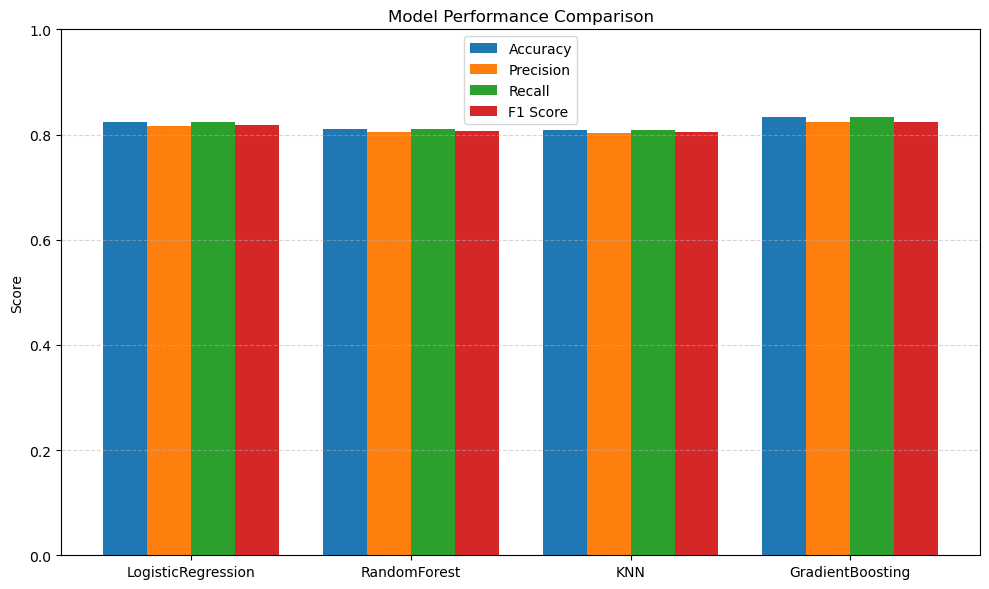

In [19]:
model_names = list(results.keys())
accuracy = [results[m]['accuracy'] for m in model_names]
precision = [results[m]['precision'] for m in model_names]
recall = [results[m]['recall'] for m in model_names]
f1 = [results[m]['f1'] for m in model_names]

x = np.arange(len(model_names))  # label locations
width = 0.2  # bar width

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.xticks(x, model_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

As we can see, GradientBoosting is best model with better f1 score and accuracy

In [20]:
best_model = max(results, key=lambda x: results[x]['f1'])  # or 'accuracy', 'recall'
print(f"Best model based on F1 Score: {best_model}")
print("Metrics:", results[best_model])

Best model based on F1 Score: GradientBoosting
Metrics: {'accuracy': 0.8324058219178082, 'precision': 0.8239899471271785, 'recall': 0.8324058219178082, 'f1': 0.8246907794736685}


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

best_model_obj = models[best_model]

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model_obj)
])

# Hyperparameters for GridSearchCV
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 5],
    "model__min_samples_split": [2, 5]
}

# Grid Search
gs = GridSearchCV(pipe, param_grid, cv=3, scoring='f1_weighted', verbose=2)
gs.fit(X_train, y_train)

# Evaluation
y_pred = gs.best_estimator_.predict(X_test)
print("\nPerformance on Test Set:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.7s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.9s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.7s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   5.1s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   5.0s
[CV] END model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   5.8s
[CV] END model__max_depth=3, model__min_samples_split=5, model__n_estimators=100; total time=   3.2s
[CV] END model__max_depth=3, model__min_samples_split=5, model__n_estimators=100; total time=   4.2s
[CV] END model__max_depth=3, model__min_samples_split=5, model__n_estimators=100; total time=   2.7s
[CV] END model__max_depth=3, mo

In [23]:
import joblib

# Saving model
joblib.dump(gs.best_estimator_, "Employee_Salary_Predict.pkl")
print("Tuned model saved as Employee_Salary_Predict.pkl")

Tuned model saved as Employee_Salary_Predict.pkl


In [24]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained pipeline
model = joblib.load("Employee_Salary_Predict.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")
st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

st.sidebar.header("Input Employee Details")

# Inputs
age = st.sidebar.slider("Age", 18, 65, 30)
workclass = st.sidebar.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov",
    "Local-gov", "State-gov", "Without-pay", "Never-worked"
])
education = st.sidebar.selectbox("Education", [
    "Bachelors", "HS-grad", "11th", "Masters", "9th", "Some-college", "Assoc-acdm",
    "Assoc-voc", "Doctorate", "Prof-school", "7th-8th", "12th", "10th", "1st-4th", "Preschool"
])
marital_status = st.sidebar.selectbox("Marital Status", [
    "Never-married", "Married-civ-spouse", "Divorced", "Separated", "Widowed", "Married-spouse-absent", "Married-AF-spouse"
])
occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
race = st.sidebar.selectbox("Race", ["White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"])
gender = st.sidebar.radio("Gender", ["Male", "Female"])
hours_per_week = st.sidebar.slider("Hours per week", 1, 100, 40)
native_country = st.sidebar.selectbox("Native Country", [
    "United-States", "India", "Mexico", "Philippines", "Germany", "Canada", "England", "China", "Other"
])

# Build input DataFrame
input_df = pd.DataFrame({
    "age": [age],
    "workclass": [workclass],
    "education": [education],
    "marital-status": [marital_status],
    "occupation": [occupation],
    "race": [race],
    "gender": [gender],
    "hours-per-week": [hours_per_week],
    "native-country": [native_country]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Prediction
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Predicted Income: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded Data Preview:")
    st.write(batch_data.head())

    try:
        batch_preds = model.predict(batch_data)
        batch_data["PredictedIncome"] = batch_preds

        st.write("✅ Predictions:")
        st.write(batch_data.head())

        csv = batch_data.to_csv(index=False).encode('utf-8')
        st.download_button("Download Predictions CSV", csv, file_name='predicted_salaries.csv', mime='text/csv')
    except Exception as e:
        st.error(f"❌ Error during prediction: {str(e)}")


Writing app.py
